# Univariate Exploration of Data

## Bar Charts
A **bar chart** depicts the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level.

- For nominal data, the bars can be ordered by frequency to easily see which category is the most common.
- Ordinal data should not be re-ordered because the inherent ordering of the levels is typically more important to display.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams

%matplotlib inline

In [2]:
pokemon = pd.read_csv('support-files/03_Univariate/pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


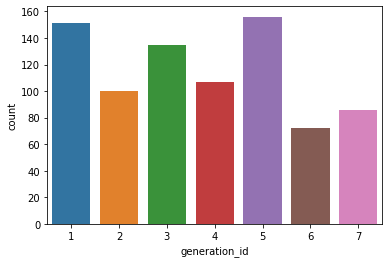

In [3]:
# there is no need for each generation to have its own color
sb.countplot(data = pokemon, x = 'generation_id');

In [4]:
# this is the default color pallete
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [5]:
# if we slice off just the first value,
# our revised chart will use only blue
base_color = sb.color_palette()[0]

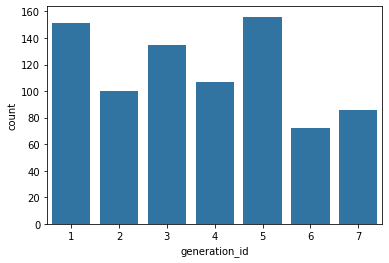

In [6]:
# revised chart without all the colors
# much cleaner!
sb.countplot(data=pokemon, x='generation_id', color=base_color);

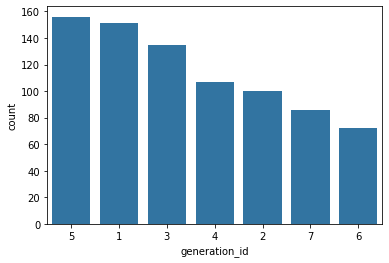

In [7]:
# we can also sort by the number of pokemons
# that were introduced in each generation
# using the order parameter

# first, get the count number programmatically
gen_order = pokemon['generation_id'].value_counts().index

sb.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order);

> Note: Refer to the `CategoricalDtype` to convert the column into an ordered categorical data type. By default, pandas reads in string data as object types, and will plot the bars in the order in which the unique values were seen. By converting the data into an ordered type, the order of categories becomes innate to the feature, and we won't need to specify an "order" parameter each time it's required in a plot.

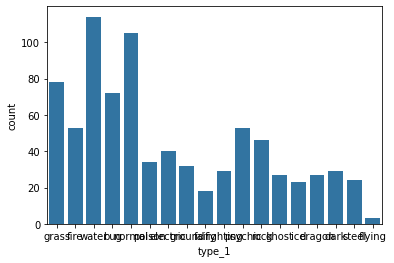

In [8]:
# moving on to pokemon type
# data is mostly unreadable due to overlap
sb.countplot(data=pokemon, x='type_1', color=base_color);

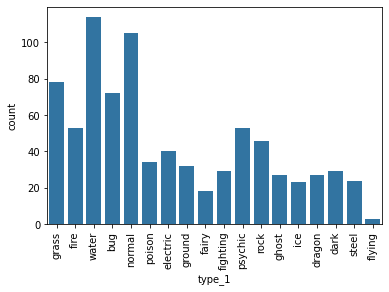

In [9]:
# we can make use of matplotlib's xtics function to rotate
# the category labels
sb.countplot(data=pokemon, x='type_1', color=base_color)
# the labels are turned 90 degrees counterclockwise
plt.xticks(rotation=90);

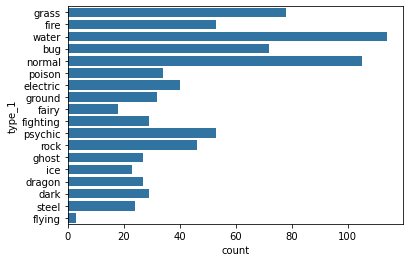

In [10]:
# an alternative approach is to create a horizontal bar chart
# in seabord, this is as simple as changing the x parameter
# into a y
sb.countplot(data=pokemon, y='type_1', color=base_color);

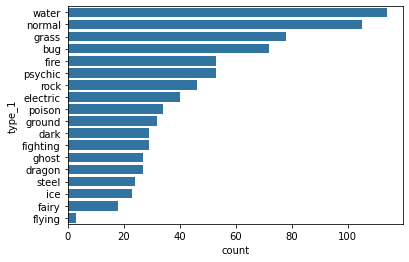

In [11]:
# sorting by type frequency
type_order = pokemon['type_1'].value_counts().index

# water and normal are the most common first types
# taken by pokemon while flying is the least common
sb.countplot(data=pokemon, y='type_1', color=base_color, order=type_order);

## Absolute Vs. Relative Frequency
Changing the count axis to reflect relative proportions makes it easier to see how much each category contributes to the whole.

In [12]:
pokemon.head(1)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65


#### Example 1: Demonstrate data wrangling, and plot a horizontal bar chart

In [13]:
pkmn_types = pokemon.melt(id_vars=['id','species'],
                         value_vars=['type_1', 'type_2'],
                         var_name='type_level', value_name='type').dropna()

pkmn_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


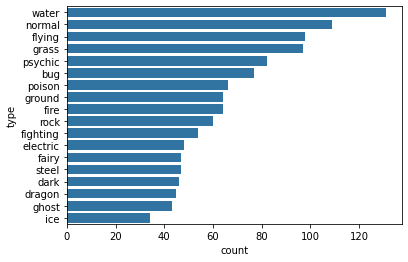

In [14]:
# get the indexes to sort the chart
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

# plot chart and sort by type
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

#### Example 2: Plot a bar chart having the proportions, instead of the actual count, on one of the axes

In [15]:
# what proportion of pokemon have each type?

# we start by finding the length of the 
# longest bar in terms of proportion

# denominator
n_pokemon = pkmn_types['type'].value_counts().sum()

# numerator
max_type_count = type_counts[0]

# length of the longest bar
max_prop = max_type_count / n_pokemon
max_prop

0.10808580858085809

In [16]:
# now, we use numpy's arange function
# to get a set of evenly spaced values
# between zero and max_prop
tick_props = np.arange(0, max_prop, 0.02)

# using list comprehension to create an additional variable
# tick_names to apply to the tick labels 
# these strings will show the proportions with a consistent
# two decimal places
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

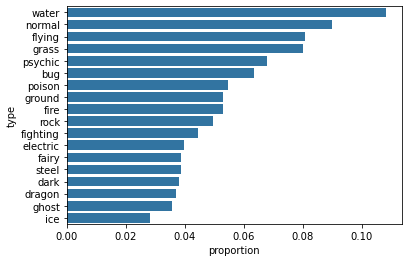

In [17]:
# modify plot to show relative frequency
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order)

# the first argument sets the tick locations:
# since the counts are still in absolute value,
# multiply tick_props by the number of pokemon
# to get their position correct
# the second argument sets the tick labels
plt.xticks(tick_props * n_pokemon, tick_names)

# use xlabel to change the default from 'count'
# to a more appropriate 'proportion'
plt.xlabel('proportion');

#### Example 3: Print the text (proportion) on the bars of a horizontal plot

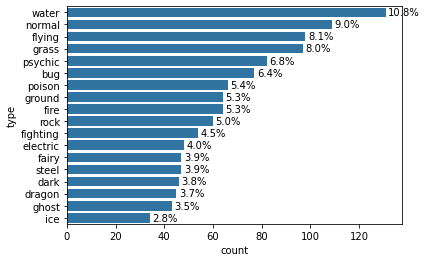

In [18]:
# rather than plotting the data on a relative frequency scale, 
# you might use text annotations to label the 
# frequencies on bars instead

# start with the plot that shows the absolute frequencies
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order)

# logic to print the proportion text on the bars
for i in range(type_counts.shape[0]):
    
    # remember, type_counts contains the frequency of 
    # unique values in the 'type' column
    count = type_counts[i]
    
    # convert count into a percentage, and then 
    # into string
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    
    # print the string value on the bar
    plt.text(count+1, i, pct_string, va='center')

Read more about the arguments the of `text()` [function](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)

#### Example 4: Print the text (proportion) below the bars of a vertical plot

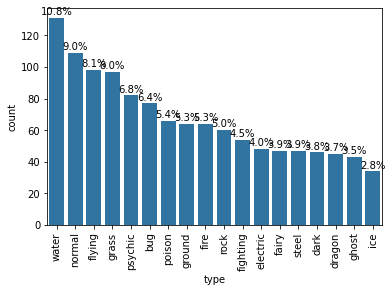

In [19]:
# start with the plot that shows the absolute frequencies
sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);

# recalculating the type_counts just to have clarity
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    
    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    
    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha='center', color='black');

The `.get_text()` [method](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text.get_text) was used to obtain the category name, so we could get the count of each category level. At the end, the `text` [function](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html) was used to print each percentage, with the x-position, y-position and string as the three main parameters to the function.

> If the text on the bars are not readable clearly, we can change the size of the plot like this:

In [20]:
# specify the figure size in inches, for both X and Y axes
rcParams['figure.figsize'] = 12,4

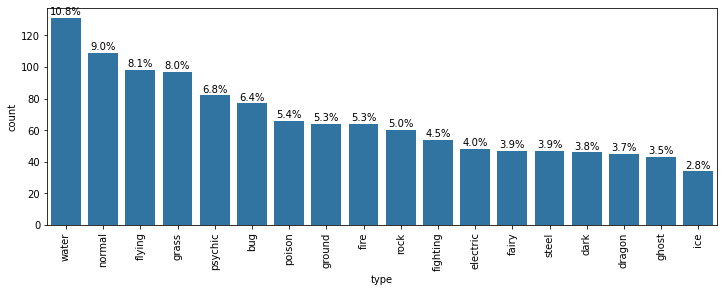

In [21]:
# run the plot code again

# start with the plot that shows the absolute frequencies
sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order)

# recalculating the type_counts just to have clarity
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    
    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    
    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha='center', color='black');

## Counting Missing Data

In [22]:
sales_data = pd.read_csv('support-files/03_Univariate/sales-data.csv')
sales_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [23]:
# 8190 lines, 12 columns
sales_data.shape

(8190, 12)

In [24]:
# create a table with the number of missing values
# in each column
sales_data.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [25]:
# what if we want to visualize these missing counts?
# first, let's drop the columns that do not have any NaN/None values
na_counts = sales_data.drop(['Date', 'Temperature', 'Fuel_Price'], axis=1).isna().sum()
na_counts

Store              0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Note: for more information on Seaborn's `barplot()` [function](https://seaborn.pydata.org/generated/seaborn.barplot.html)

In [26]:
na_counts.index.values

array(['Store', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'], dtype=object)

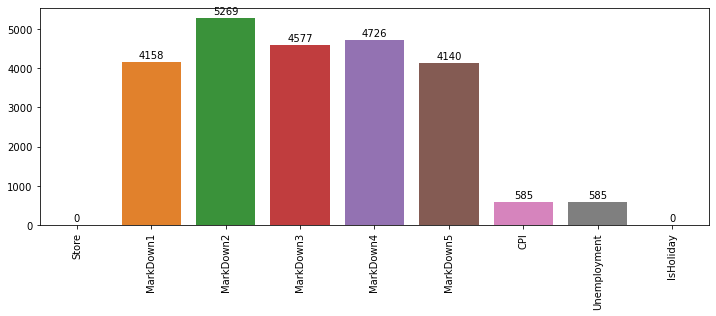

In [27]:
# plot the bar chart from the NaN tabular data
# and also print values on each bar

# the first argument to the function contains the x-values (column names)
# the second contains the y-values (our counts)
sb.barplot(x=na_counts.index.values, y=na_counts)

# get the current tick locations and labels
plt.xticks(rotation=90)

# logic to print value on each bar
for i in range(na_counts.shape[0]):
    count = na_counts[i]
    
    plt.text(i, count+300, count, ha='center', va='top');

> Note: The `seaborn.barplot()` is a useful function to keep in mind if your data is summarized and you still want to build a bar chart. If your data is not yet summarized, however, just use the `countplot` function so that you don't need to do extra summarization work.

## Bar Chart Practice
In this exercise, you'll be working with the dataset comprised of attributes of creatures in the video game series Pokémon. The data was assembled from the database of information found in this [GitHub repository](https://github.com/veekun/pokedex/tree/master/pokedex/data/csv).

#### **TO DO Task 1** 
`1.` Explore the `pokemon` dataframe, and try to understand the significance of each of its column.

`2.` There have been quite a few Pokémon introduced over the series' history. Display the count of Pokémon introduced in each generation? Create a _bar chart_ of these frequencies using the 'generation_id' column.

In [28]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [29]:
gen_count = pokemon['generation_id'].value_counts()
gen_count

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

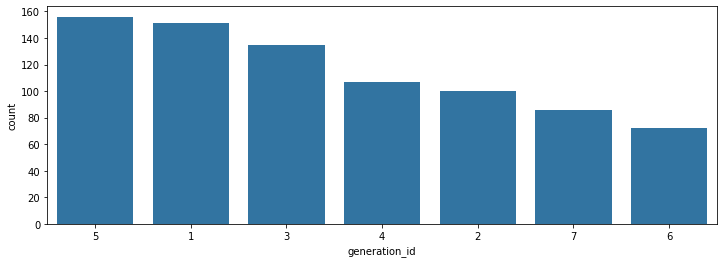

In [30]:
base_color = sb.color_palette()[0]
sb.countplot(data=pokemon, x='generation_id', order=gen_count.index, color=base_color);

#### **TO DO Task 2** 
1. Each Pokémon species has either `type_1`, `type_2` or both `types` that play a part in its offensive and defensive capabilities. The code below creates a new dataframe `pkmn_types` that club the rows of both `type_1` and `type_2`, so that the resulting dataframe has **new** column, `type_level`. 

**Display, how frequent is each type?**

The function below will do the following in the pokemon dataframe *out of place*:
1. Select the 'id', and 'species' columns from pokemon. 
2. Remove the 'type_1', 'type_2' columns from pokemon
3. Add a new column 'type_level' that can have a value either 'type_1' or 'type_2'
4. Add another column 'type' that will contain the actual value contained in the 'type_1', 'type_2' columns. For example, the first row in the pokemon dataframe having `id=1`	and `species=bulbasaur` will now occur twice in the resulting dataframe after the `melt()` operation. The first occurrence will have `type=grass`, whereas, the second occurrence will have `type=poison`.

In [31]:
pkmn_types = pokemon.melt(id_vars=['id', 'species'],
                         value_vars=['type_1', 'type_2'],
                         var_name='type_level', value_name='type').dropna()

pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


In [32]:
# checking to see if it worked
# there should be two entries for each pokemon
# testing with bulbasaur
pkmn_types.query('species == "bulbasaur"')

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
807,1,bulbasaur,type_2,poison


2. Your task is to use this dataframe to create a _relative frequency_ plot of the proportion of Pokémon with each type, _sorted_ from most frequent to least. 

> **Hint**: The sum across bars should be greater than 100%, since many Pokémon have two types. Keep this in mind when considering a denominator to compute relative frequencies.

In [33]:
# value counts for the type column
type_counts = pkmn_types['type'].value_counts()

# get the index to set the order of the bars
type_order = type_counts.index

# denominator
n_pokemon = pkmn_types.shape[0]

# numerator: the the max frequency
max_type_count = type_counts[0]

# length of the longest bar
max_prop = max_type_count / n_pokemon
max_prop

0.10808580858085809

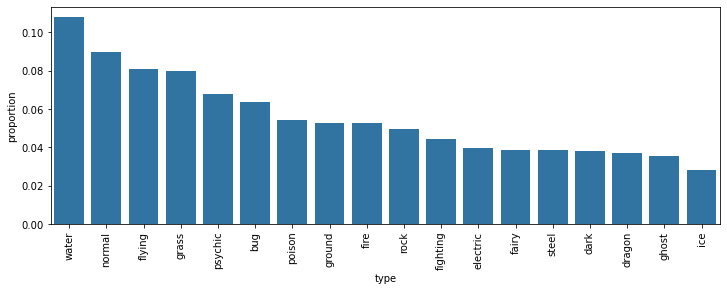

In [34]:
# now, we use numpy's arange function
# to get a set of evenly spaced values
# between zero and max_prop
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# plotting bar chart to show relative frequency

# start with base plot
sb.countplot(data=pkmn_types, x='type', order=type_order, color=base_color)

# the first argument sets the tick locations:
# since the counts are still in absolute value,
# multiply tick_props by the number of pokemon
# to get their position correct
# the second argument sets the tick labels
plt.yticks(tick_props * n_pokemon, tick_names)

# rotate x-ticks
plt.xticks(rotation=90)

# change the x-label from 'count' to something more appropriate,
# like 'proportion'
plt.ylabel('proportion');

In [35]:
pkmn_types['type_level'].value_counts()

type_1    807
type_2    405
Name: type_level, dtype: int64

In [36]:
rcParams['figure.figsize'] = 6,4

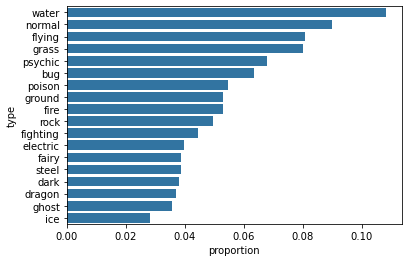

In [37]:
# as a horizontal bar chart: 

# now, we use numpy's arange function
# to get a set of evenly spaced values
# between zero and max_prop
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# plotting to show relative frequency

# start with base plot
sb.countplot(data=pkmn_types, y='type', order=type_order, color=base_color)

# the first argument sets the tick locations:
# since the counts are still in absolute value,
# multiply tick_props by the number of pokemon
# to get their position correct
# the second argument sets the tick labels
plt.xticks(tick_props * n_pokemon, tick_names)

# change the x-label from 'count' to something more appropriate,
# like 'proportion'
plt.xlabel('proportion');